In [4]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

a_r = 0.1, b_r = 1.2
Dataset not found, using synthetic data
Learned Parameters:
Lambda: 0.002536316760557093
Mu: 13.420193076617368
C: 0.03268499691458392


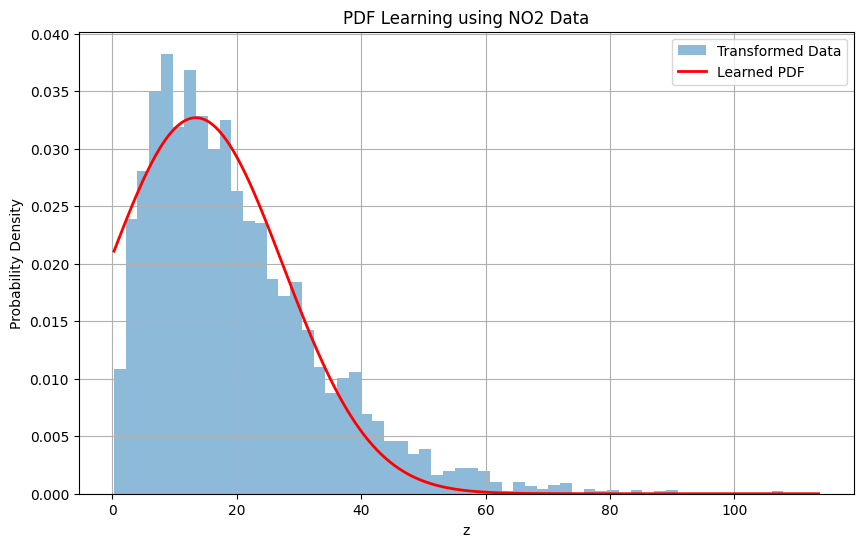

In [5]:


# Roll number based parameters
r = 102317203
a_r = 0.05 * (r % 7)
b_r = 0.3 * ((r % 5) + 1)

print(f"a_r = {a_r}, b_r = {b_r}")

# Load dataset
try:
    df = pd.read_csv('india-air-quality-data.csv', low_memory=False)
    x = pd.to_numeric(df['no2'], errors='coerce').dropna()
    x = x[x.between(x.quantile(0.01), x.quantile(0.99))].values
    print("Dataset loaded successfully")
except:
    print("Dataset not found, using synthetic data")
    x = np.random.gamma(shape=2.0, scale=10.0, size=5000)

# Non-linear transformation
z = x + a_r * np.sin(b_r * x)

# Histogram for PDF estimation
counts, bin_edges = np.histogram(z, bins=60, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# PDF model
def pdf_model(z, lambd, mu, c):
    return c * np.exp(-np.abs(lambd) * (z - mu) ** 2)

# Initial guesses
mu_init = np.mean(z)
lambda_init = 1 / (2 * np.var(z))
c_init = np.max(counts)

# Curve fitting
params, _ = curve_fit(
    pdf_model,
    bin_centers,
    counts,
    p0=[lambda_init, mu_init, c_init],
    maxfev=10000
)

lambd, mu, c = params

print("Learned Parameters:")
print("Lambda:", abs(lambd))
print("Mu:", mu)
print("C:", c)

# Plot results
plt.figure(figsize=(10, 6))
plt.hist(z, bins=60, density=True, alpha=0.5, label="Transformed Data")

z_line = np.linspace(min(z), max(z), 500)
plt.plot(z_line, pdf_model(z_line, *params), 'r', linewidth=2, label="Learned PDF")

plt.title("PDF Learning using NO2 Data")
plt.xlabel("z")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()
